In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
import cv2

In [ ]:
from sklearn.utils import shuffle
#from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

In [ ]:
from IPython.display import display, HTML
import itertools
import shutil

In [ ]:
import os.path
from os import path

In [ ]:
from google.colab import files

In [ ]:
from IPython.display import display, HTML

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install -q kaggle

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dylanadimoolum","key":"1bf3e9fe081713b80f7a7324a9759c3b"}'}

In [ ]:
# Parent Directory path
directory = '.kaggle'
parent_dir = "/root/"
  
# Path
path = os.path.join(parent_dir, directory)
  
# Create the directory
os.mkdir(path)

In [ ]:
shutil.move('/content/kaggle.json', '/root/.kaggle/')

'/root/.kaggle/kaggle.json'

In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
IMAGE_SIZE = 96
IMAGE_CHANNELS = 3
SAMPLE_SIZE = 80000 # the number of images we use from each of the two classes

In [ ]:
#if path.exists('/content/Dataset') == False:
 # os.mkdir('/content/Dataset')
#os.chdir('/content/Dataset')
#!pwd
#!ls

AttributeError: ignored

In [ ]:
os.mkdir('/content/Dataset')
os.chdir('/content/Dataset')

In [ ]:
url = '/content/Dataset/'

In [ ]:
! kaggle datasets list

ref                                                             title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------  ------  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                               9KB  2022-10-06 08:55:25           7596        247  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset        11KB  2022-09-30 04:05:11           6123        198  1.0              
whenamancodes/students-performance-in-exams                     Students Performance in Exams                  9KB  2022-09-14 15:14:54          10861        199  1.0              
dimitryzub/walmart-coffee-listings-from-500-stores              Walmart Coffee Listings from 50

In [ ]:
!kaggle competitions download -c histopathologic-cancer-detection

100% 6.31G/6.31G [00:36<00:00, 229MB/s]
100% 6.31G/6.31G [00:36<00:00, 186MB/s]


In [ ]:
! mkdir cancer-data

In [ ]:
! unzip histopathologic-cancer-detection.zip -d cancer-data

Streaming output truncated to the last 5000 lines.
  inflating: cancer-data/train/fa2c546059bd262cbe954dfdba24dc0d67f598b0.tif  
  inflating: cancer-data/train/fa2c657eff58b6802cb32843caa2fac25b67c2c9.tif  
  inflating: cancer-data/train/fa2c775c4457d0aeb7e57216849eef5f4e72e566.tif  
  inflating: cancer-data/train/fa2c77e1707c2fe7b0016e00736fb6e4b7f09488.tif  
  inflating: cancer-data/train/fa2ce5e802dd281bd98fcfb538e80b9c96c2b7af.tif  
  inflating: cancer-data/train/fa2d24e4a109d2d3a925890aaed4e0f038dfffb0.tif  
  inflating: cancer-data/train/fa2d7e4865aa7869d2dd85116323b8405c94f1c2.tif  
  inflating: cancer-data/train/fa2d8b2e4acf46e278e2e7acbc034c263d970737.tif  
  inflating: cancer-data/train/fa2df9148831509a181797db79eb1a7bf39593f1.tif  
  inflating: cancer-data/train/fa2e6db0b35484797f58005e3a6e24ca75fbca76.tif  
  inflating: cancer-data/train/fa2e80e84594465329bdc0c8d1b3a507275fbb4d.tif  
  inflating: cancer-data/train/fa2eaf8ec6267fa928a88775dc15ee25b633c537.tif  
  inflating: 

In [ ]:
url = '/content/Dataset/cancer-data'
os.listdir(url)
print(len(os.listdir(url+'/train')))
print(len(os.listdir(url+'/test')))

220025
57458


In [ ]:
df = pd.read_csv(url+'/train_labels.csv')
# removing this image because it caused a training error previously
df[df['id'] != 'dd6dfed324f9fcb6f93f46f32fc800f2ec196be2']
# removing this image because it's black
df[df['id'] != '9369c7278ec8bcc6c880d99194de09fc2bd4efbe']

print(df.shape)

(220025, 2)


0    130908
1     89117
Name: label, dtype: int64

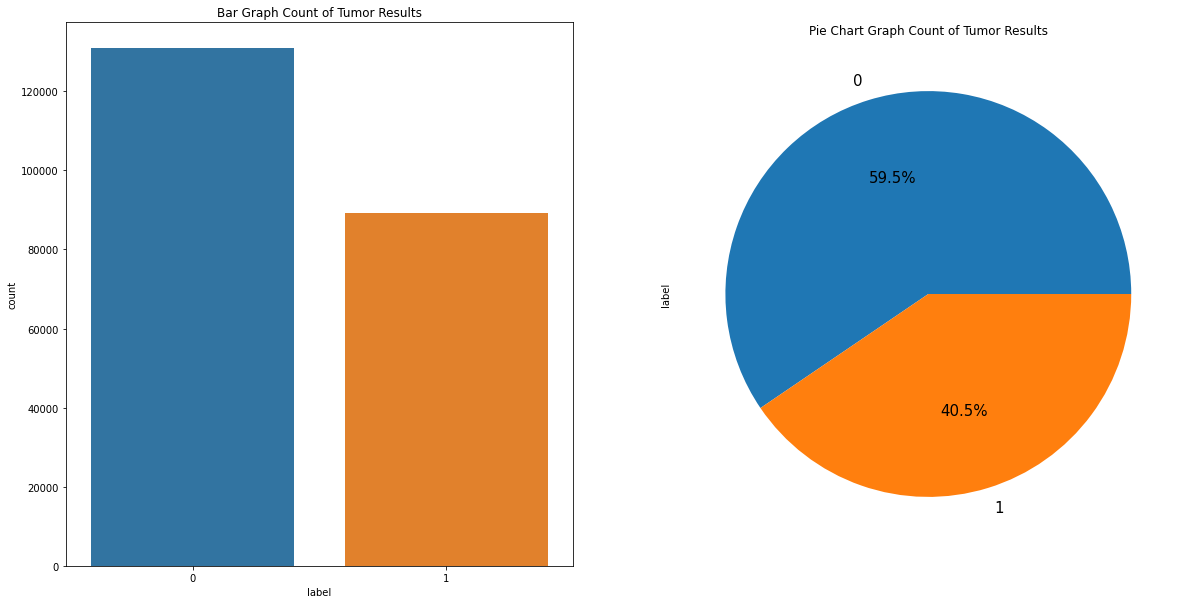

In [ ]:
df['label'].value_counts()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.set_title('Bar Graph Count of Tumor Results')
ax2.set_title('Pie Chart Graph Count of Tumor Results')
sns.countplot(x=df['label'], ax=ax1)
df['label'].value_counts().plot.pie(autopct='%1.1f%%',shadow=False,textprops={'fontsize': 15},ax=ax2) 
df['label'].value_counts()

In [ ]:
# source: https://www.kaggle.com/gpreda/honey-bee-subspecies-classification

def draw_category_images(col_name,figure_cols, df, IMAGE_PATH):
  
    categories = (df.groupby([col_name])[col_name].nunique()).index
    f, ax = plt.subplots(nrows=len(categories),ncols=figure_cols, 
                         figsize=(4*figure_cols,4*len(categories))) # adjust size here
    # draw a number of images for each location
    for i, cat in enumerate(categories):
        sample = df[df[col_name]==cat].sample(figure_cols) # figure_cols is also the sample size
        for j in range(0,figure_cols):
            file=IMAGE_PATH + sample.iloc[j]['id'] + '.tif'
            im=cv2.imread(file)
            ax[i, j].imshow(im, resample=True, cmap='gray')
            ax[i, j].set_title(cat, fontsize=16)  
    plt.tight_layout()
    plt.show()

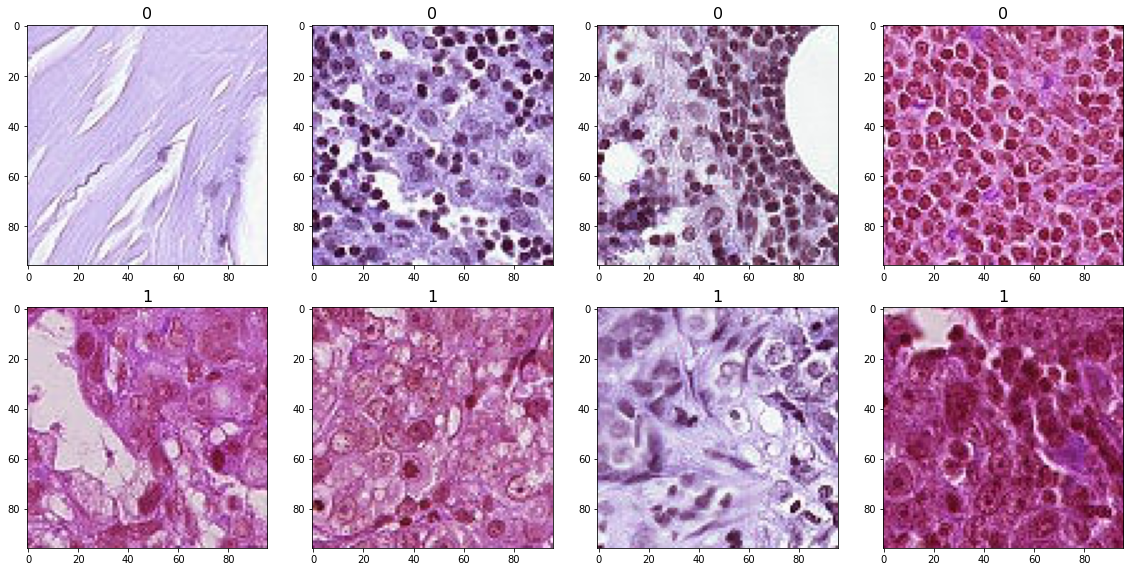

In [ ]:
IMAGE_PATH = url+'/train/'
draw_category_images('label',4,df,IMAGE_PATH)

In [ ]:
df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [ ]:
# take a random sample of class 0 with size equal to num samples in class 1
df_0 = df[df['label'] == 0].sample(SAMPLE_SIZE, random_state = 101)
# filter out class 1
df_1 = df[df['label'] == 1].sample(SAMPLE_SIZE, random_state = 101)

# concat the dataframes
df = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)
# shuffle
df = shuffle(df)

df['label'].value_counts()

0    80000
1    80000
Name: label, dtype: int64

In [ ]:
df.head()

,id,label
63661,9981174f92d2cdc06e21ec91fab52bc8a672127a,0
84630,5bb1d2f3ccb0bf01583dfd3dcbfe6e60b6ade103,1
28463,dc6e7357a5b9e9e3709bb107cd084481f7c431d9,0
150931,da35c089dbffa2b84a4c4d851bf105303ef005b4,1
4903,f3f1a10f60156d5f5f7ba73605c7ff6d64a830a6,0


In [ ]:
# train_test_split
# stratify=y creates a balanced validation set.
y = df['label']

df_train, df_val = train_test_split(df, test_size=0.10, random_state=101, stratify=y)
print(df_train.shape)
print(df_val.shape)

(144000, 2)
(16000, 2)


0    72000
1    72000
Name: label, dtype: int64


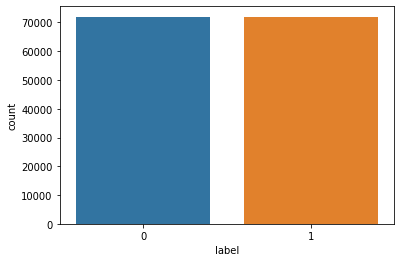

In [ ]:
print(df_train['label'].value_counts())
sns.countplot(x='label', data=df_train);

0    8000
1    8000
Name: label, dtype: int64


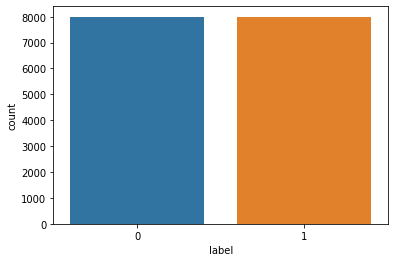

In [ ]:
print(df_val['label'].value_counts())
sns.countplot(x='label', data=df_val)

In [ ]:
os.path.isdir('base_dir')

False

In [ ]:
if os.path.isdir('base_dir'):
    print('the directory as well as the images have been created and sorted')
else:
    print('Sorting')
    # Create a new directory
    base_dir = 'base_dir'
    os.mkdir(base_dir)


    #[CREATE FOLDERS INSIDE THE BASE DIRECTORY]

    # now we create 2 folders inside 'base_dir':

    # train_dir
        # a_no_tumor_tissue
        # b_has_tumor_tissue

    # val_dir
        # a_no_tumor_tissue
        # b_has_tumor_tissue

    # create a path to 'base_dir' to which we will join the names of the new folders
    # train_dir
    train_dir = os.path.join(base_dir, 'train_dir')
    os.mkdir(train_dir)

    # val_dir
    val_dir = os.path.join(base_dir, 'val_dir')
    os.mkdir(val_dir)



    # [CREATE FOLDERS INSIDE THE TRAIN AND VALIDATION FOLDERS]
    # Inside each folder we create seperate folders for each class

    # create new folders inside train_dir
    no_tumor_tissue = os.path.join(train_dir, 'a_no_tumor_tissue')
    os.mkdir(no_tumor_tissue)
    has_tumor_tissue = os.path.join(train_dir, 'b_has_tumor_tissue')
    os.mkdir(has_tumor_tissue)


    # create new folders inside val_dir
    no_tumor_tissue = os.path.join(val_dir, 'a_no_tumor_tissue')
    os.mkdir(no_tumor_tissue)
    has_tumor_tissue = os.path.join(val_dir, 'b_has_tumor_tissue')
    os.mkdir(has_tumor_tissue)
    
    
    # Set the id as the index in df_data
    df.set_index('id', inplace=True)
    
    
    
    # Get a list of train and val images
    train_list = list(df_train['id'])
    val_list = list(df_val['id'])



    # Transfer the train images
    for image in train_list:
        
        # the id in the csv file does not have the .tif extension therefore we add it here
        fname = image + '.tif'
        # get the label for a certain image
        target = df.loc[image,'label']
        
        # these must match the folder names
        if target == 0:
            label = 'a_no_tumor_tissue'
        if target == 1:
            label = 'b_has_tumor_tissue'
        
        # source path to image
        src = os.path.join(url+'/train', fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)


    # Transfer the val images

    for image in val_list:
        
        # the id in the csv file does not have the .tif extension therefore we add it here
        fname = image + '.tif'
        # get the label for a certain image
        target = df.loc[image,'label']
        
        # these must match the folder names
        if target == 0:
            label = 'a_no_tumor_tissue'
        if target == 1:
            label = 'b_has_tumor_tissue'
        

        # source path to image
        src = os.path.join(url+'/train', fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

Sorting


In [ ]:
# check how many train images we have in each folder

print(len(os.listdir('base_dir/train_dir/a_no_tumor_tissue')))
print(len(os.listdir('base_dir/train_dir/b_has_tumor_tissue')))

72000
72000


In [ ]:
# check how many val images we have in each folder

print(len(os.listdir('base_dir/val_dir/a_no_tumor_tissue')))
print(len(os.listdir('base_dir/val_dir/b_has_tumor_tissue')))

8000
8000


In [ ]:
train_path = 'base_dir/train_dir'
valid_path = 'base_dir/val_dir'
test_path = '../input/test'

num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 10
val_batch_size = 10


train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255)

train_gen = datagen.flow_from_directory(train_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=train_batch_size,
                                        class_mode='categorical')

val_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=val_batch_size,
                                        class_mode='categorical')

# Note: shuffle=False causes the test dataset to not be shuffled
test_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=1,
                                        class_mode='categorical',
                                        shuffle=False)

Found 144000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.


In [ ]:
#kernel_size = (3,3)
#pool_size= (2,2)
#first_filters = 32
#second_filters = 64
#third_filters = 128

#dropout_conv = 0.3
#dropout_dense = 0.3

model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (96, 96, 3)))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2))) 
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation ='relu'))
model.add(Conv2D(64, (3,3), activation ='relu'))
model.add(Conv2D(64, (3,3), activation ='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation ='relu'))
model.add(Conv2D(128, (3,3), activation ='relu'))
model.add(Conv2D(128, (3,3), activation ='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(2, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 92, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 45, 45, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 45, 45, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 43, 43, 64)        18496     
                                                        

In [ ]:
plot_model(model)

In [ ]:
model.compile(Adam(lr=0.0001), loss='binary_crossentropy', 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Get the labels that are associated with each index
print(val_gen.class_indices)

{'a_no_tumor_tissue': 0, 'b_has_tumor_tissue': 1}


In [ ]:
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit_generator(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=10, verbose=1,
                   callbacks=callbacks_list)

Epoch 1/10
    1/14400 [..............................] - ETA: 22:32 - loss: 0.6912 - accuracy: 0.5000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  from ipykernel import kernelapp as app


14400/14400 [==============================] - ETA: 0s - loss: 0.4347 - accuracy: 0.8017

14400/14400 [==============================] - 297s 21ms/step - loss: 0.4347 - accuracy: 0.8017 - val_loss: 0.4596 - val_accuracy: 0.7904 - lr: 1.0000e-04
Epoch 2/10
14399/14400 [============================>.] - ETA: 0s - loss: 0.3409 - accuracy: 0.8521

14400/14400 [==============================] - 251s 17ms/step - loss: 0.3409 - accuracy: 0.8521 - val_loss: 0.3744 - val_accuracy: 0.8354 - lr: 1.0000e-04
Epoch 3/10
14397/14400 [============================>.] - ETA: 0s - loss: 0.2914 - accuracy: 0.8782

14400/14400 [==============================] - 228s 16ms/step - loss: 0.2914 - accuracy: 0.8782 - val_loss: 0.3603 - val_accuracy: 0.8627 - lr: 1.0000e-04
Epoch 4/10
14397/14400 [============================>.] - ETA: 0s - loss: 0.2636 - accuracy: 0.8919

14400/14400 [==============================] - 227s 16ms/step - loss: 0.2636 - accuracy: 0.8919 - val_loss: 0.2620 - val_accuracy: 0.8915 - lr: 1.0000e-04
Epoch 5/10
14400/14400 [==============================] - ETA: 0s - loss: 0.2452 - accuracy: 0.9010

14400/14400 [==============================] - 228s 16ms/step - loss: 0.2452 - accuracy: 0.9010 - val_loss: 0.2371 - val_accuracy: 0.9041 - lr: 1.0000e-04
Epoch 6/10
14399/14400 [============================>.] - ETA: 0s - loss: 0.2312 - accuracy: 0.9078

14400/14400 [==============================] - 228s 16ms/step - loss: 0.2312 - accuracy: 0.9078 - val_loss: 0.3018 - val_accuracy: 0.8753 - lr: 1.0000e-04
Epoch 7/10
14398/14400 [============================>.] - ETA: 0s - loss: 0.2211 - accuracy: 0.9127

14400/14400 [==============================] - 228s 16ms/step - loss: 0.2211 - accuracy: 0.9127 - val_loss: 0.2140 - val_accuracy: 0.9167 - lr: 1.0000e-04
Epoch 8/10
14397/14400 [============================>.] - ETA: 0s - loss: 0.2104 - accuracy: 0.9172

14400/14400 [==============================] - 229s 16ms/step - loss: 0.2104 - accuracy: 0.9172 - val_loss: 0.2029 - val_accuracy: 0.9202 - lr: 1.0000e-04
Epoch 9/10
14399/14400 [============================>.] - ETA: 0s - loss: 0.2020 - accuracy: 0.9210

14400/14400 [==============================] - 229s 16ms/step - loss: 0.2020 - accuracy: 0.9210 - val_loss: 0.2031 - val_accuracy: 0.9199 - lr: 1.0000e-04
Epoch 10/10
14399/14400 [============================>.] - ETA: 0s - loss: 0.1963 - accuracy: 0.9238

14400/14400 [==============================] - 236s 16ms/step - loss: 0.1963 - accuracy: 0.9238 - val_loss: 0.1925 - val_accuracy: 0.9229 - lr: 1.0000e-04


In [ ]:
# get the metric names so we can use evaulate_generator
model.metrics_names

['loss', 'accuracy']

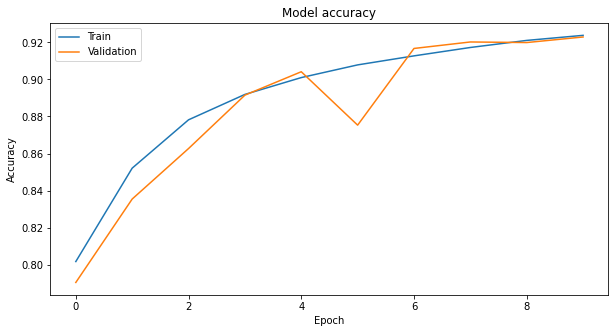

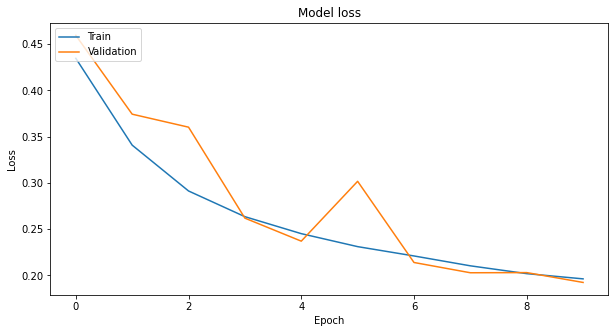

In [ ]:
# Model Accuracy
fig, axl = plt.subplots(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

 # Model Loss
fig, axl = plt.subplots(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

In [ ]:
# make a prediction
predictions = model.predict_generator(test_gen, steps=len(df_val), verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


16000/16000 [==============================] - 57s 4ms/step


In [ ]:
# Put the predictions into a dataframe.
df_preds = pd.DataFrame(predictions, columns=['no_tumor', 'has_tumor'])
df_preds.head()

,no_tumor,has_tumor
0,0.999931,0.000069
1,0.999987,0.000013
2,0.999971,0.000029
3,0.454740,0.545260
4,0.882006,0.117994


In [ ]:
# Get the true labels
y_test = test_gen.classes
# Get the predicted labels as probabilities
y_pred = df_preds['has_tumor']
# For this to work we need y_pred as binary labels not as probabilities
y_pred_binary = predictions.argmax(axis=1)

In [ ]:
def Confusion_Matrix_Graph(y_test):
  cm = confusion_matrix(y_test,y_pred_binary)
  plt.subplots(figsize=(18, 6))
  sns.heatmap(cm/np.sum(cm), annot= True, fmt='.2%', cmap='Blues')

In [ ]:
def ROC_Curve_Graph(y_test):
  fpr, tpr, _ = roc_curve(y_test,  y_pred)
  auc = roc_auc_score(y_test, y_pred)
  plt.subplots(figsize=(18, 6))
  plt.plot(fpr,tpr,label="Prediction, auc="+str(auc))
  plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
  plt.legend(loc=4)
  plt.show()

In [ ]:
def Classification_Report(y_test):
  display(HTML('convolutional neural network'))
  print('----------------------------------------------------------------')
  print("The Accuracy of the model is : ", accuracy_score(y_test, y_pred_binary)*100, "%")
  print('----------------------------------------------------------------')
  # Look at classification report to evaluate the model
  print(classification_report(y_test, y_pred_binary, target_names = ['no_tumor', 'has_tumor']))

In [ ]:
pipeline = Pipeline(steps=[('classification_report', Classification_Report(y_test)),('confusion_matrix_graph',Confusion_Matrix_Graph(y_test)),('',ROC_Curve_Graph(y_test))])

0.922875

In [ ]:
display(HTML('convolutional neural network'))
print('----------------------------------------------------------------')
print("The Accuracy of the model is : ", accuracy_score(y_test, y_pred_binary)*100, "%")
print('----------------------------------------------------------------')
# Look at classification report to evaluate the model
print(classification_report(y_test, y_pred_binary, target_names = ['no_tumor', 'has_tumor']))

----------------------------------------------------------------
The Accuracy of the model is :  92.2875 %
----------------------------------------------------------------
              precision    recall  f1-score   support

    no_tumor       0.91      0.94      0.92      8000
   has_tumor       0.94      0.91      0.92      8000

    accuracy                           0.92     16000
   macro avg       0.92      0.92      0.92     16000
weighted avg       0.92      0.92      0.92     16000



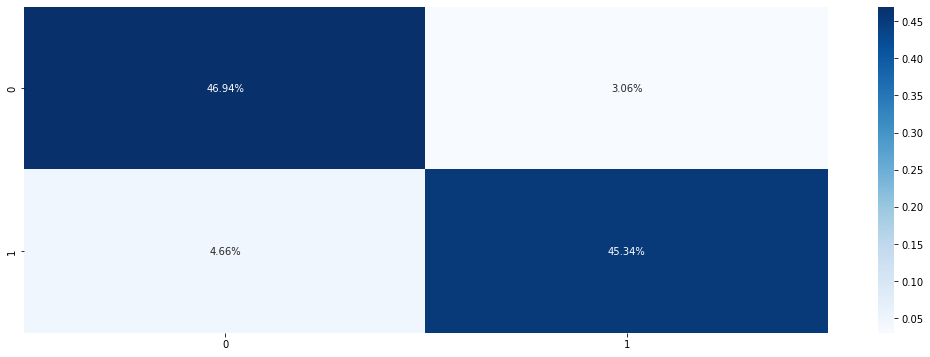

In [ ]:
Confusion_Matrix_Graph(y_test)

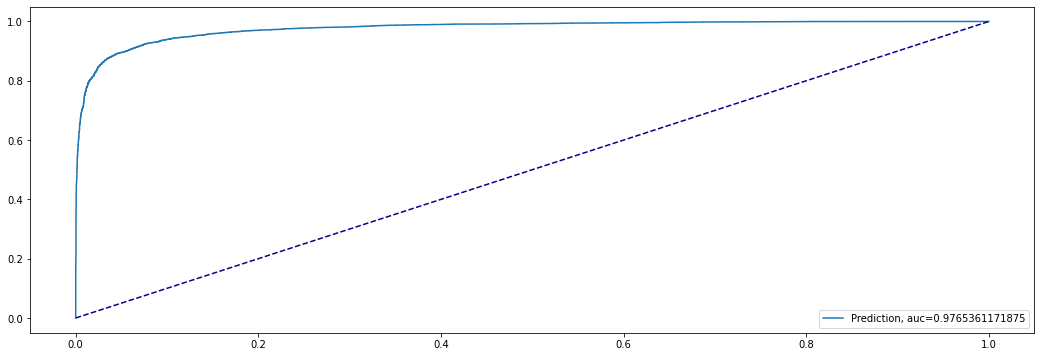

In [ ]:
ROC_Curve_Graph(y_test)